In [1]:
from __future__ import print_function

#Probability and Statistics in Python

##Probability Distributions

###1: The dataset

In many countries, there are bikesharing programs where anyone can rent a bike from a depot, and return it at other depots throughout a city. There is one such program in Washington, D.C., in the US. We'll be looking at the number of bikes that were rented by day. Here are the relevant columns:
- dteday -- the date that we're looking at.
- casual -- the number of casual riders (people who hadn't previously signed up with the bikesharing program) that rented bikes on the day.
- registered -- the number of registered riders (people who signed up previously) that rented bikes.
- cnt -- the total number of bikes rented.

This data was collected by Hadi Fanaee-T at the University of Porto and can be downloaded <a href = "http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">here</a>.

In [2]:
import pandas

bikes = pandas.read_csv("data/day.csv")
bikes[:5]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


###2: Binomial distributions

We can define $p$ as the probability of an outcome occurring, and $q$ as the probability of it not occuring, where $q=1−p$. These types of probabilites are known as binomial -- there are two values, which add to 1 collectively. There's a 100% chance of one outcome or the other occurring. 

Many commonly occurring events can be expressed in terms of binomial outcomes -- a coin flip, winning a football game, the stock market going up, and more.

When we deal with binomial probabilities, we're often interested in the chance of a certain outcome happening in a sequence. We want to know what the chances are of our favorite football team winning 5 of its next 6 games, and the stock market going up in 4 of the next 6 days.

The same interest applies when we're analyzing data. Companies and researchers conduct experiments every day. These can range from testing if changing the button color on your homepage increases conversion rate to seeing if a new drug increases patient recovery rate.

The core of these tests is the idea of a binomial distribution -- we want to know how many visitors out of 100 would normally sign up for our website, and we want to know if our button color change affected that probability.

One easy way to visualize binomials is a binomial distribution. Given N events, it plots the probabilities of getting different numbers of successful outcomes.

###3: Bikesharing distribution

Let's say we're working for the mayor of Washington, DC, Muriel Bowser. She wants to know on how many days out of the next 30 we can expect more than 5000 riders.

Rather than give her an exact number, which may not be accurate, we can hedge our bets with a probability distribution. This will show her all the possibilities, along with probabilities for each.

First, we have to find the probability of there being more than 5000 riders in a single day.

####Instructions

Find the probability of there being more than 5000 riders in a single day (the cnt column). Assign the result to prob_over_5000.

In [3]:
prob_over_5000 = float(bikes[bikes["cnt"] > 5000].shape[0]) / bikes.shape[0]
print("prob_over_5000:", prob_over_5000)

prob_over_5000: 0.3912448700410397


###4: Computing the distribution

We now know that the probability is about .39 that there are more than 5000 riders in a single day. We can find the probability of k outcomes out of N events occurring. We'll need to use this to build up a list of probabilities.

The formula to use is:

$(p^{k} * q^{N-k}) * \frac{N!}{k!(N-k)!}$

####Instructions

Create a function that can compute the probability of k outcomes out of N events occuring.

Use the function to find the probability of each number of outcomes in outcome_counts occurring. An outcome is a day where there are more than 5000 riders, with $p=.39$.

At the end, you should have a list with 31 items, where the first item is the probability of 0 days out of 30 with more than 5000 riders, the second is the probability of 1 day out of 30, and so on, up to 30 days out of 30.

Assign the result to outcome_probs.

In [4]:
import math

# Each item in this list represents one k, starting from 0 and going up to and including 30.
outcome_counts = list(range(31))
print("outcome_counts:", outcome_counts)

def find_probability(N, k, p, q):
    # Find the probability of any single combination.
    term_1 = p ** k
    term_2 = q ** (N-k)
    combo_prob = term_1 * term_2
    
    # Find the number of combinations.
    numerator = math.factorial(N)
    denominator = math.factorial(k) * math.factorial(N - k)
    combo_count = float(numerator) / denominator
    
    return combo_prob * combo_count

outcome_probs = [find_probability(30, i, .39, .61) for i in outcome_counts]
print("outcome_probs:", outcome_probs)

outcome_counts: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
outcome_probs: [3.6299032553937196e-07, 6.962273457066644e-06, 6.454369901592111e-05, 0.00038514600724254565, 0.0016621260066655757, 0.0055258877729799805, 0.014720602673922079, 0.03226811265290648, 0.059312493954215416, 0.09269602880276286, 0.12445581572043082, 0.1446729303456573, 0.14645169588269408, 0.12964576356828655, 0.10065004829715923, 0.06864003293707908, 0.04114182302068777, 0.021661943461230015, 0.010002372800404023, 0.004038921890068234, 0.0014202438449502238, 0.00043239273968039596, 0.00011309228884338227, 2.5149532515420715e-05, 4.6897693829985355e-06, 7.196105151617426e-07, 8.847670268382081e-08, 8.380306993731663e-09, 5.740608420764663e-10, 2.5311896937232547e-11, 5.394338691541363e-13]


###5: Plotting the distribution

You may have noticed that our outcome_counts list above was 31 items long when N was only 30. This is because we need to account for 0. There's a chance of having $k=0$, where the outcome we want doesn't happen at all. This data point needs to be on our charts. We'll always want to add 1 to to N when figuring out how many points to plot.

Our data is in terms of whole days. Either 1 day has more than 5000 riders, or 2 days have more than 5000 riders. It doesn't make sense to talk about the probability of 1.5 days having more than 5000 riders. The points in our data are <a href = "https://en.wikipedia.org/wiki/Probability_distribution#Discrete_probability_distribution">discrete</a> and not <a href = "https://en.wikipedia.org/wiki/Continuous_and_discrete_variables">continuous</a>, so we use a bar chart when plotting.

Now that we've computed the distribution, we can easily plot it out using matplotlib. This will show us a nice distribution of our probabilities, along with the most likely outcomes.

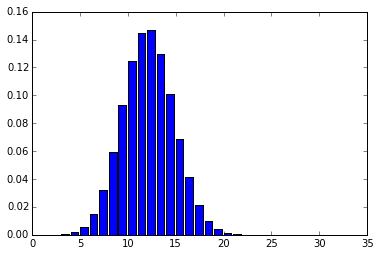

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# The most likely number of days is between 10 and 15.
plt.bar(outcome_counts, outcome_probs)
plt.show()

###6: Simplifying the computation

To construct our distribution, we had to write our own custom function, and a decent amount of code. We can instead use the <a href = "http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html">binom</a> function from <a href = "http://docs.scipy.org/doc/scipy/reference/index.html">SciPy</a> to do this faster.

Here's a usage example:

    from scipy import linspace
    from scipy.stats import binom

    Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
    outcome_counts = linspace(0,30,31)

    Create the binomial probabilities, one for each entry in outcome_counts.
    dist = binom.pmf(outcome_counts,30,0.39)

The pmf function in SciPy is an implementation of the mathematical <a href = "https://en.wikipedia.org/wiki/Probability_mass_function">probability mass function</a>. pmf will give us the probability of each k in our outcome_counts list occurring.

As you can see, a binomial distribution only needs two parameters. A parameter is statistical term for a number that summarizes data for the entire population -- in this case, the parameters are N, the total number of events, and p, the probability of the outcome we're interested in seeing. Since we only need two parameters to describe our distribution, these are the numbers we pass into the pmf function from SciPy.

Because of the fact that we only need two parameters to describe a distribution, it doesn't matter whether we want to know if it will be sunny 5 days out of 5, or if 5 out of 5 coin flips will turn up heads. As long as the outcome that we care about has the same probability ($p$), and $N$ is the same, the binomial distribution will look the same.

####Instructions

Generate a binomial distribution, and then find the probabilities for each value in outcome_counts. Use N=30, and p=.39, as we're doing this for the bikesharing data.

Plot the resulting data as a bar chart.

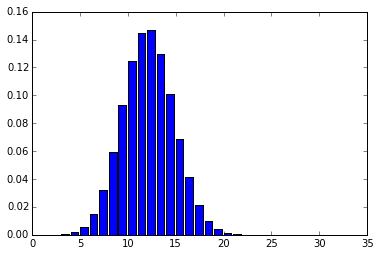

In [6]:
import scipy
from scipy import linspace
from scipy.stats import binom
import matplotlib.pyplot as plt
%matplotlib inline

# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = linspace(0,30,31)
# Create the binomial distribution.
outcome_probs = binom.pmf(outcome_counts,30,0.39)
plt.bar(outcome_counts, outcome_probs)
plt.show()

###7: How to think about a probability distribution

Looking at a probability distribution might not be extremely intuitive. One way to think about it is that "if we repeatedly look at samples, the expected number of outcomes will follow the probability distribution". 

If we repeatedly look at 30 days of bikesharing data, we'll find that 10 of the days had more than 5000 riders about 12.4% of the time. We'll find that 12 of the days had more than 5000 riders about 14.6% of the time.

A probability distribution is a great way to visualize data, but bear in mind that it's not dealing in absolute values. A probability distribution can only tell us which values are likely, and how likely they are.

###8: Computing the mean of a probability distribution

Sometimes we'll want to be able to tell people the expected value of a probability distribution -- the most likely result of a single sample that we look at.

To compute this, we just multiply $N$ by $p$.

####Instructions

Compute the mean for the bikesharing data, where $N=30$, and $p=.39$. Assign the result to dist_mean.

In [7]:
dist_mean = None
dist_mean = 30 * .39

print("dist_mean:", dist_mean)

dist_mean: 11.700000000000001


###9: Computing the standard deviation

Just as we can compute the mean, we can also compute the standard deviation of a probability distribution. This helps us find how much the actual values will vary from the mean when we take a sample. 

Going back to the bikesharing example, we know that the actual values will be around 11.7 (from the last screen). But, we'll need a standard deviation to explain how much the actual values can vary from this expectiation.

The formula for standard deviation of a probability distribution is:

$\sqrt{N*p*q}$

####Instructions

Compute the standard deviation for the bikesharing data, where $N=30$, and $p=.39$. Assign the result to dist_stdev.

In [8]:
import math

dist_stdev = None
dist_stdev = math.sqrt(30 * .39 * .61)
print("dist_stdev:", dist_stdev)

dist_stdev: 2.671516423307182


###10: A different plot

Just like we did with histograms and sampling a few missions ago, we can vary the parameters to change the distribution. Let's see what the plot would look like with only 10 events, or 100 events.

####Instructions

Generate a binomial distribution, with N=10, and p=.39. Find the probabilities for each value in outcome_counts. Plot the resulting data as a bar chart.

Generate a binomial distribution, with N=100, and p=.39. Find the probabilities for each value in outcome_counts. Plot the resulting data as a bar chart.

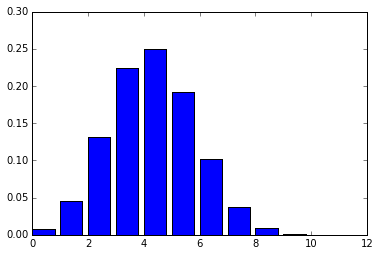

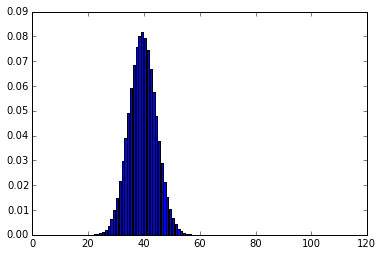

In [9]:
import scipy
from scipy import linspace
from scipy.stats import binom
import matplotlib.pyplot as plt
%matplotlib inline

outcome_counts = linspace(0,10,11)
outcome_probs = binom.pmf(outcome_counts,10,0.39)
plt.bar(outcome_counts, outcome_probs)
plt.show()

outcome_counts = linspace(0,100,101)
outcome_probs = binom.pmf(outcome_counts,100,0.39)
plt.bar(outcome_counts, outcome_probs)
plt.show()

###11: The normal distribution

As you can see above, the more events we look at, the closer our distribution gets to normal. With $N=10$, we see some rightward skew, but when we get up to $N=100$, the skew disappears. 

This is because the distribution gets narrower relative to the x-axis range the more examples you add. With $N=10$, there's a reasonable chance that 8 to 10 days could have over 5000 riders. But, when we get up to $N=100$, it's statistically almost impossible that more than 60 days have over 5000 riders. This makes the distribution narrower.

As the distribution gets narrower, it gets more similar to the normal distribution. As you can see below, when we plot a line and not a bar chart, it looks almost exactly like a normal distribution.

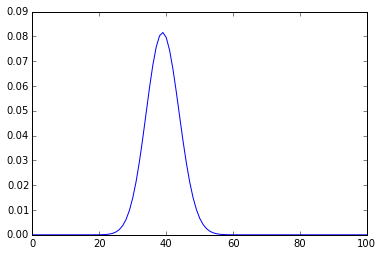

In [10]:
import scipy
from scipy import linspace
from scipy.stats import binom
import matplotlib.pyplot as plt
%matplotlib inline

# Create a range of numbers from 0 to 100, with 101 elements (each number has one entry).
outcome_counts = scipy.linspace(0,100,101)

# Create a probability mass function along the outcome_counts.
outcome_probs = binom.pmf(outcome_counts,100,0.39)

# Plot a line, not a bar chart.
plt.plot(outcome_counts, outcome_probs)
plt.show()

###12: Cumulative density function

So far, we've looked at the probability that single values of k will occur. What we can look at instead is the probability that k or less will occur. These probabilities can be generated by the <a href = "https://en.wikipedia.org/wiki/Binomial_distribution">cumulative density function</a>. 

Let's say we flip a coin 3 times -- $N=3$, and $p=.5$. When this happens, here are the probabilities:

    k    probability
    0    .125
    1    .375
    2    .375
    3    .125


A cumulative distribution would look like this:

    k    probability
    0    .125
    1    .5
    2    .875
    3    1


For each k, we fill in the probability that we'll see k outcomes or less. By the end of the distribution, we should get 1, because all the probabilities add to 1 (if we flip 3 coins, either 0, 1, 2, or 3 of them must be heads).

We can calculate this with binom.cdf in scipy.

    from scipy import linspace
    from scipy.stats import binom

    Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
    outcome_counts = linspace(0,30,31)

    Create the cumulative binomial probabilities, one for each entry in outcome_counts.
    dist = binom.cdf(outcome_counts,30,0.39)

####Instructions

Create a cumulative distribution where $N=30$ and $p=.39$. Make a line plot of the distribution.

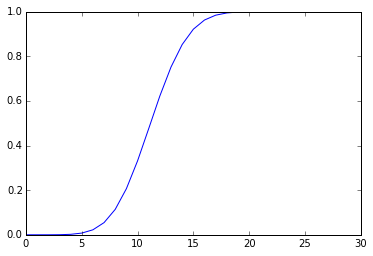

In [11]:
import scipy
from scipy import linspace
from scipy.stats import binom
import matplotlib.pyplot as plt
%matplotlib inline

outcome_counts = linspace(0,30,31)
outcome_probs = binom.cdf(outcome_counts,30,0.39)
plt.plot(outcome_counts, outcome_probs)
plt.show()

###13: Calculating z-scores

We can calculate z-scores (the number of standard deviations away from the mean a probability is) fairly easily. These z-scores can then be used how we used z-scores earlier -- to find the percentage of values to the left and right of the value we're looking at.

To make this more concrete, say we had 16 days where we observed more than 5000 riders. Is this likely? Unlikely? Using a z-score, we can figure out exactly how common this event is.

This is because every normal distribution, as we learned in an earlier mission, has the same properties when it comes to what percentage of the data is within a certain number of standard deviations of the mean. You can look these up in a <a href = "https://en.wikipedia.org/wiki/Standard_normal_table">standard normal table</a>. About 68% of the data is within 1 standard deviation of the mean, 95% is within 2, and 99% is within 3.

We can calculate the mean (μ ) and standard deviation (σ ) of a binomial probability distribution using the formulas from earlier:

$\mu = N * p$

$\sigma = \sqrt{N*p*q}$

If we want to figure out the number of standard deviations from the mean a value is, we just do:

$\frac{k - \mu}{\sigma}$

If we wanted to find how many standard deviations from the mean 16 days is:

$\frac{16 - \mu}{\sigma} = \frac{16 - (30 * .39)}{\sqrt{16*.39*.61}} = \frac{4.3}{1.95} = 2.2$

Based on the standard z-score table, this is unlikely -- a 2.8% chance. This tells us that 97.2% of the data is within 2.2 standard deviations of the mean, so so a result to be as different from the mean as this, there is a 2.8% probability that it occurred by chance.

Note that this means both "sides" of the distribution. There's a 1.4% chance that a value is 2.2 standard deviations or more above the mean (to the right of the mean), and there's a 1.4% chance that a value is 2.2 standard devitation below the mean (to the left).

###14: Faster way to calculate likelihood

We don't want to have to use a z-score table every time we want to see how likely or unlikely a probability is. A much faster way is to use the cumulative distribution fuction (cdf) like we did earlier. This won't give us the exact same values as using z-scores, because the distribution isn't exactly normal, but it will give us the actual amount of probability in a distribution to the left of a given k.

To use it, we can run:

    The sum of all the probabilities to the left of k, including k.
    left = binom.cdf(k,N,p)

    The sum of all probabilities to the right of k.
    right = 1 - left

This will return the sum of all the probabilities to the left of and including k. If we subtract this value from 1, we get the sum of all the probabilities to the right of k.

####Instructions

Find the probability to the left of $k=16$ (including 16) when $N=30$ and $p=.39$. Assign the result to left_16.

Find the probability to the right of $k=16$ when $N=30$ and $p=.39$. Assign the result to right_16.

In [12]:
left_16 = None
right_16 = None
left_16 = binom.cdf(16,30,0.39)
right_16 = 1 - left_16

print("left_16:", left_16)
print("right_16:", right_16)

left_16: 0.962300376605
right_16: 0.0376996233945
